# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


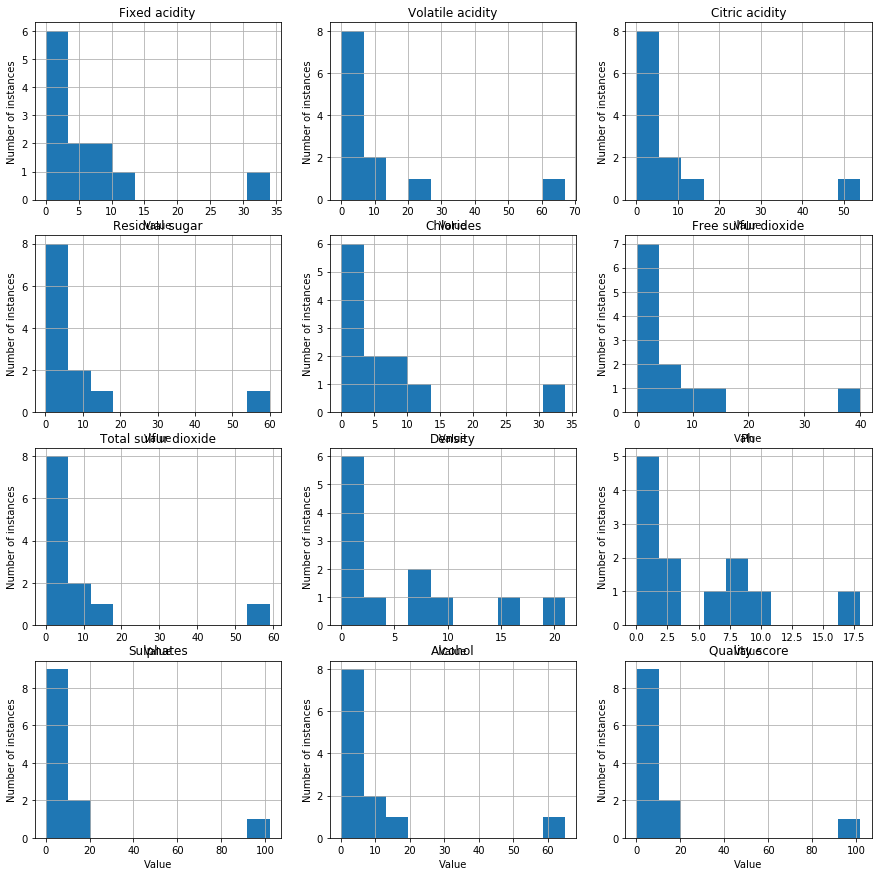

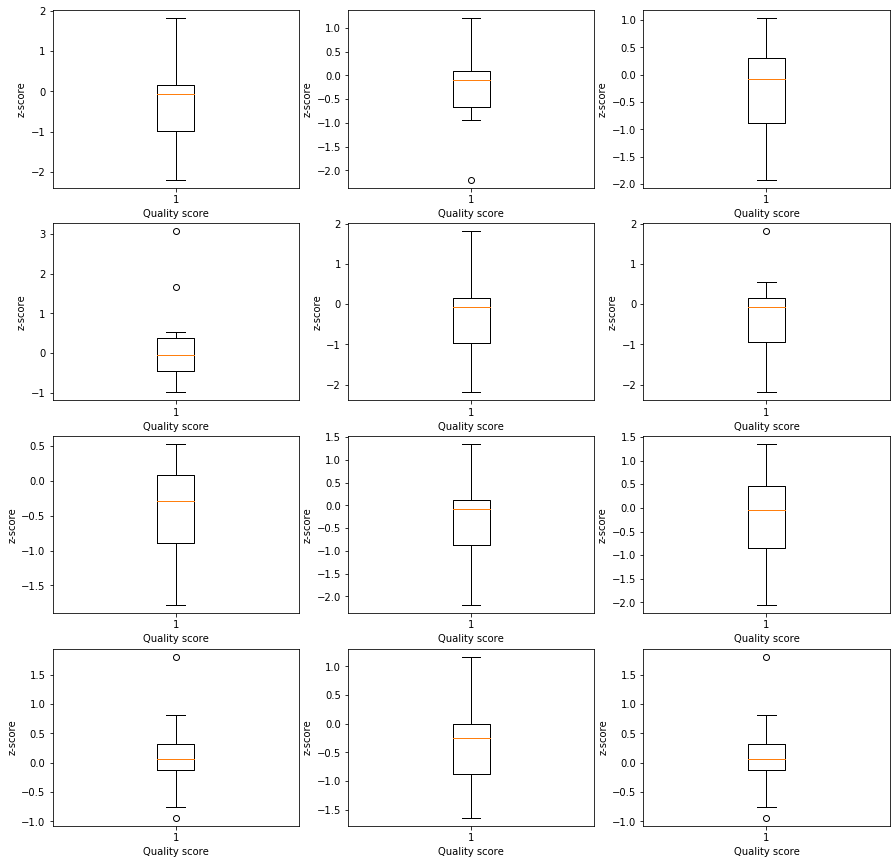

In [37]:
import scipy.io
import scipy.stats as st
import matplotlib.pyplot as mp
import numpy as np

LoadData = scipy.io.loadmat("Data/wine.mat")

AttributeArray = LoadData['attributeNames']

Rows= LoadData["X"]







xlabels =( "Fixed acidity", "Volatile acidity", "Citric acidity" , "Residual sugar", "Chlorides", "Free sulfur dioxide", "Total sulfur dioxide", "Density", "Ph", "Sulphates", "Alcohol", "Quality score")

f, a = mp.subplots(4,3, figsize=(15,15))
a = a.ravel()

for idx, ax in enumerate(a):
    ax.hist(Rows[idx])
    ax.set_title(xlabels[idx])
    ax.set_ylabel("Number of instances")
    ax.set_xlabel("Value")
    ax.grid(True)
    
mp.show()

test2 = Rows
RowsSt = st.stats.zscore(test2)

f2, a2 = mp.subplots(4,3, figsize=(15,15))
a2 = a2.ravel()

for idx2, ax2 in enumerate(a2):
    ax2.boxplot(RowsSt[idx2])
    
    ax2.set_xlabel(xlabels[idx])
    ax2.set_ylabel("z-score")



mp.show()
mp.close()

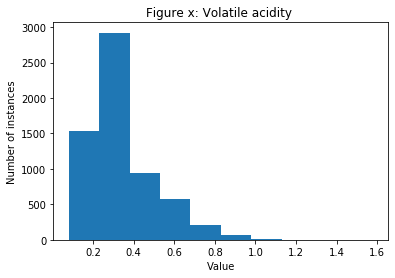

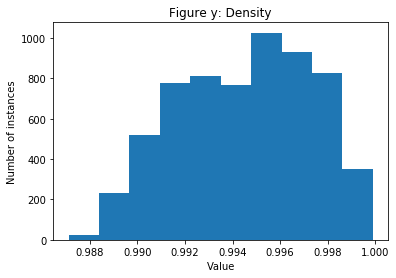

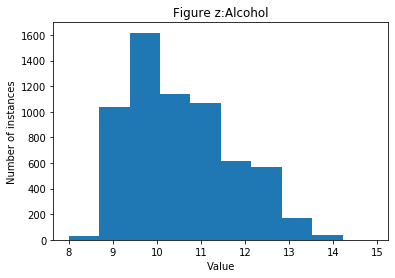

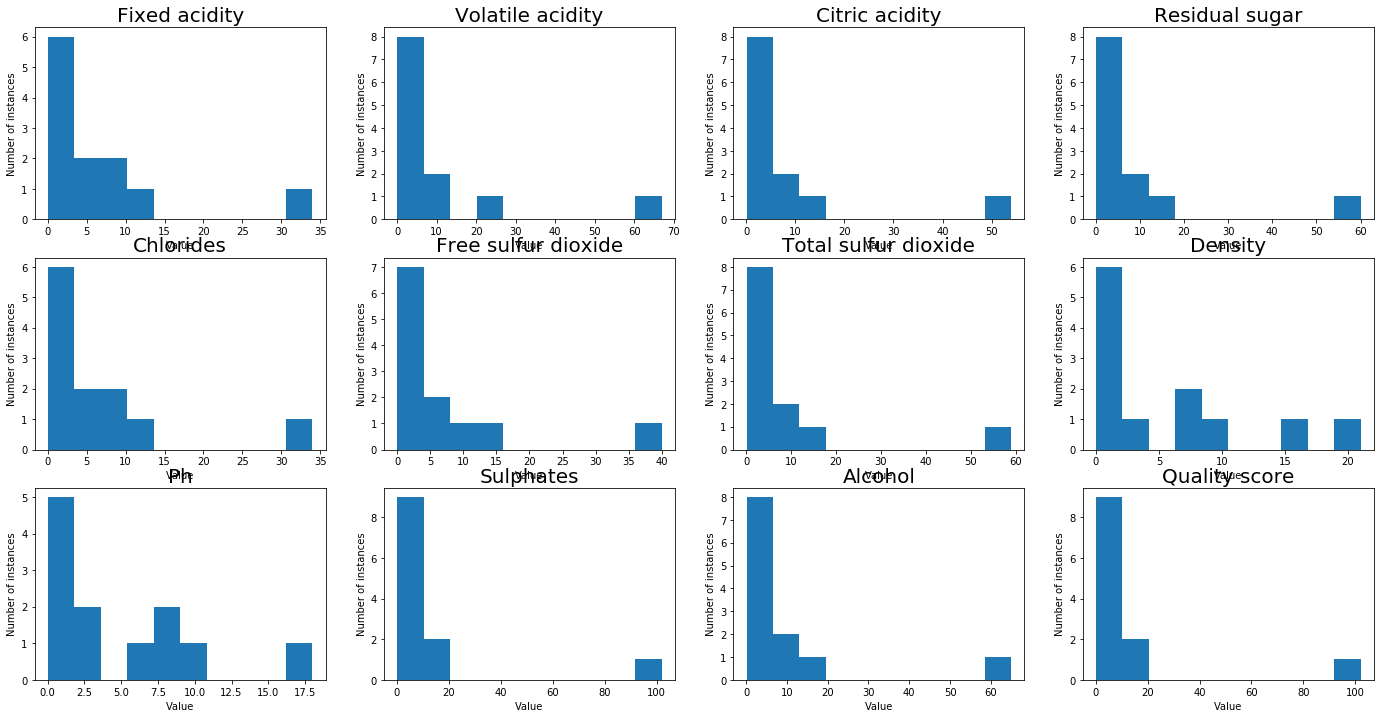

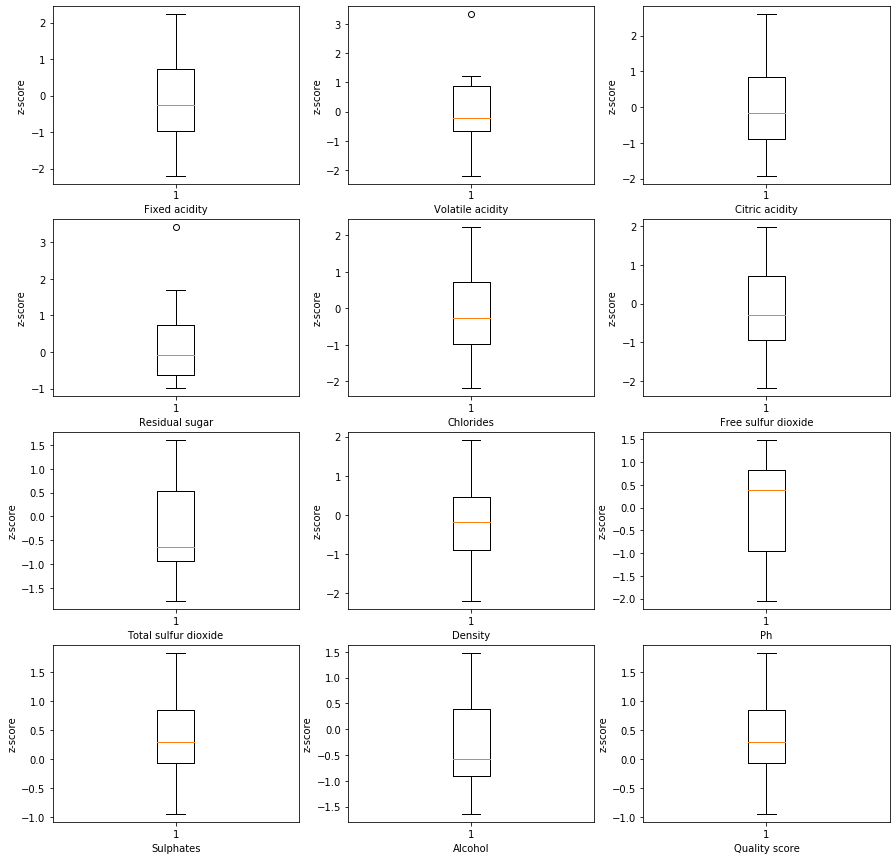

In [38]:
row1 = []
row2 = []
row3 = []
Rows_filtered = []
for row in Rows:
    if row[1] < 20 and row[7]< 1 and 5 <= row[10] <= 20:
        Rows_filtered.append(row)
        row1.append(row[1])
        row2.append(row[7])
        row3.append(row[10])

New_rows = Rows_filtered       
mp1 = mp.hist(row1)
mp.title("Figure x: Volatile acidity ")
mp.xlabel("Value")
mp.ylabel("Number of instances")
mp.show()
mp2 = mp.hist(row2)
mp.title("Figure y: Density")
mp.xlabel("Value")
mp.ylabel("Number of instances")
mp.show()
mp3 = mp.hist(row3)
mp.title("Figure z:Alcohol")
mp.xlabel("Value")
mp.ylabel("Number of instances")
mp.show()
                        
cf, carr = mp.subplots(3,4, figsize=(24,12))
carr = carr.ravel()
for cf, cx in enumerate(carr):
    cx.hist(New_rows[cf])
    cx.set_title(xlabels[cf],fontsize = 20)
    cx.set_xlabel("Value")
    cx.set_ylabel("Number of instances")
    

mp.show()
RowsSt2 = st.stats.zscore(Rows_filtered)
f4, a4 = mp.subplots(4,3, figsize=(15,15))
a4 = a4.ravel()

for idx, ax in enumerate(a4):
    ax.boxplot(RowsSt2[idx])
    ax.set_ylabel("z-score")
    ax.set_xlabel(xlabels[idx])


mp.show()
mp.close()

----
Surely a difference can be seen between the two sets of boxplots. Only the subplotting of the histograms has some issues where it shows the old data somehow?

I filtered the data based on the specifications given bij the exercise and in figure x , y and z it can be seen that it worked. I have been fiddling around with the second set of histograms but couldn't get it to work. 

By plotting figure x, y and z i've made sure the filtering was done correctly so I can continue using the data for the next exercises. 

Standardization has been done before both sets of boxplots.

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----
If one decides to remove the outliers this should be done before standardizing the data. Outliers are usually an instance that either doesnt reperesent the population or is created by a technical/measurement error. There for the the values can be unrealistic high. Standardization is based on the mean and standard deviation, if outliers with their possibly extremely high values are taken into account they can have a unreasonable impact on the standardization process. And therefor skew the entire data analysis of the population. 

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

pearson correlation coefficient Fixed acidity :
(0.9697785882717995, 1.8872200723457763e-07)
pearson correlation coefficient Volatile acidity :
(0.9781838280619383, 3.752202713067843e-08)
pearson correlation coefficient Citric acidity :
(0.9899289597754355, 8.022662795560034e-10)
pearson correlation coefficient Residual sugar :
(0.9862095719764716, 3.8382313431125116e-09)
pearson correlation coefficient Chlorides :
(0.9697785882717995, 1.8872200723457763e-07)
pearson correlation coefficient Free sulfur dioxide :
(0.9772803553394315, 4.5892496537358076e-08)
pearson correlation coefficient Total sulfur dioxide :
(0.9926793128988032, 1.6356994039042028e-10)
pearson correlation coefficient Density :
(0.8207232746877778, 0.0010702694818198106)
pearson correlation coefficient Ph :
(0.8402039169132107, 0.0006234027862688103)
pearson correlation coefficient Sulphates :
(1.0, 0.0)
pearson correlation coefficient Alcohol :
(0.9961325809639667, 6.769480166094805e-12)
pearson correlation coefficie

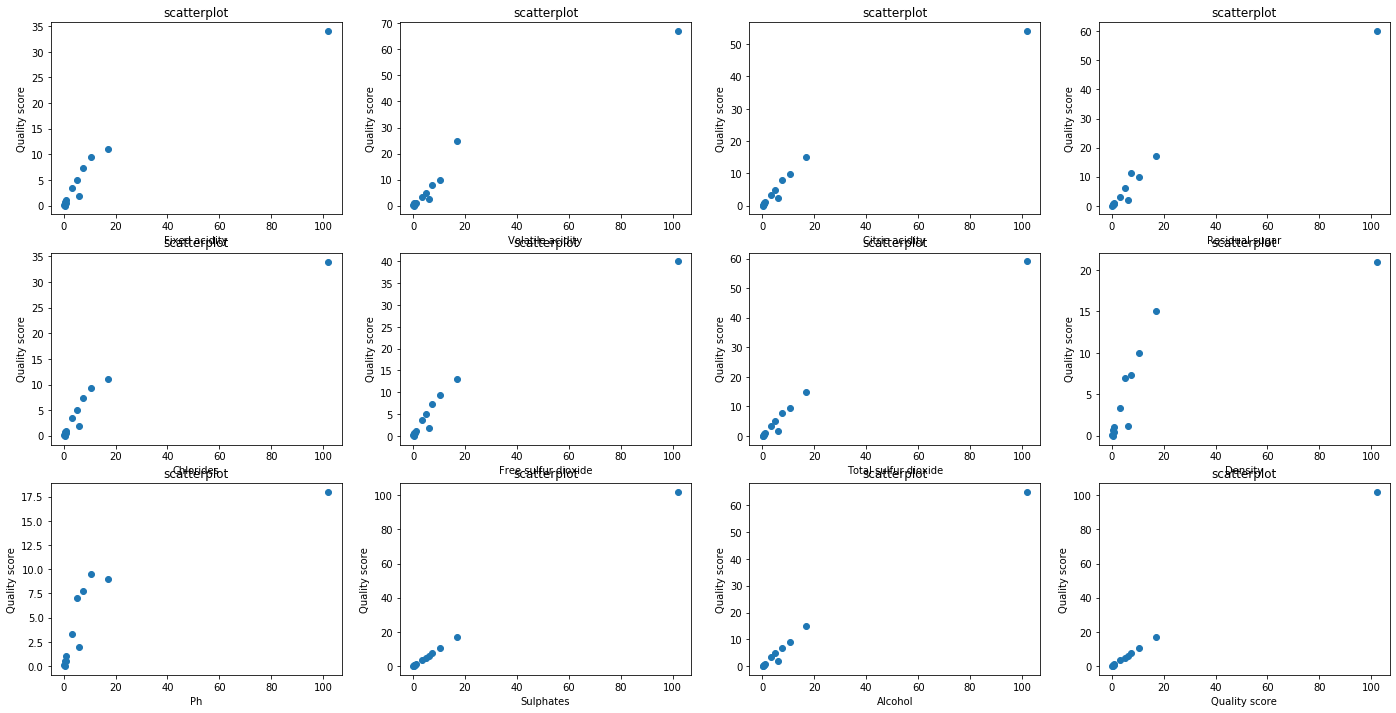

In [39]:
##Answer to question 2.1.2
sf, sarr = mp.subplots(3,4, figsize=(24,12))
v = 0
h = 0
for i in range(12):
    if h == 4:
        h = 0 
        v += 1
    sarr[v,h].scatter(np.array(Rows[11]), np.array(Rows[i]))
    sarr[v,h].set_xlabel(xlabels[i])
    sarr[v,h].set_ylabel("Quality score")
    sarr[v,h].set_title("scatterplot")
    print("pearson correlation coefficient",xlabels[i], ":")
    print(st.stats.pearsonr(New_rows[i],Rows[11]))
    h+=1
    

----
Also here somehow the outliers are still in the dataset, although I am convinced my outlier removal procedure should work it appears it has some issues. 

On visual inspection of the scatterplots we can see that almost every attribute shows some form of a straight lines which could indicate some kind of correlation. ofcourse the last plot is an obvious correlation because the quality score is plotted agains the quality score.

There is one more good correlation which is confirmed by the pearson correlation and that is the correlation between sulphates and quality score. Between these 2 there is a perfect correlation

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


[[ 4.4708816   8.39776877  2.12581223  1.84030614]
 [10.53787121  0.74450079 -0.39967766 -8.82019179]
 [-0.50936756  0.33073997  4.53661257  3.35363615]
 ...
 [ 3.89680276 -1.4700305   7.66336529 -2.62319694]
 [16.98743035  2.85960046 -0.22612498  2.27706523]
 [-7.32303279  3.11927668 -1.65454947 -1.5502774 ]]


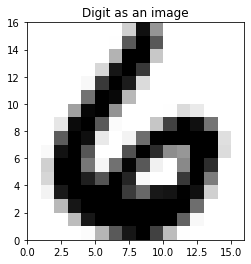

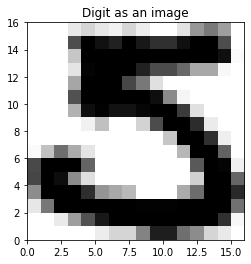

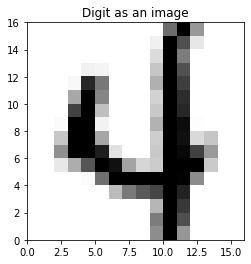

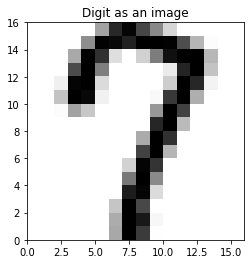

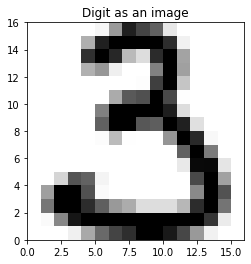

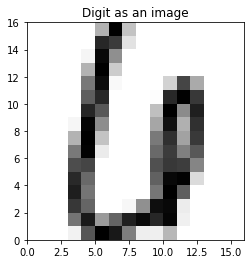

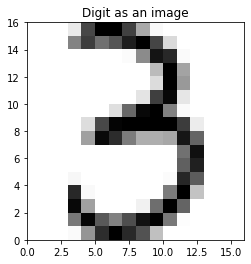

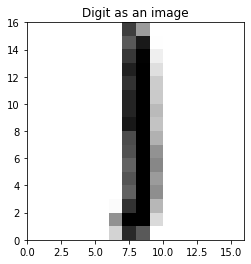

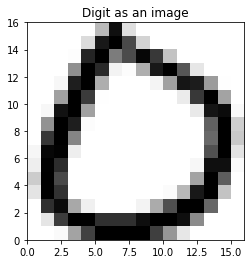

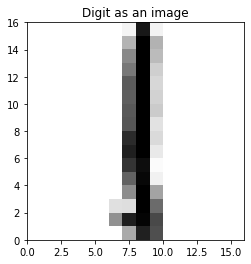

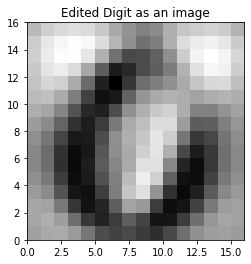

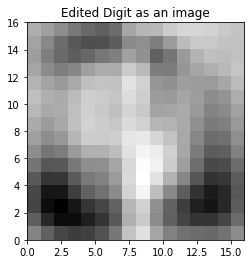

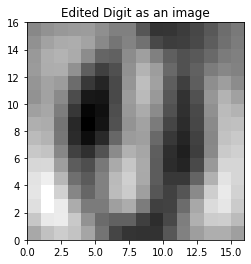

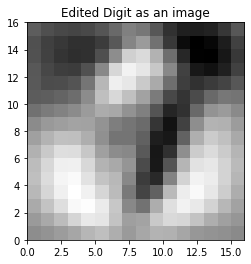

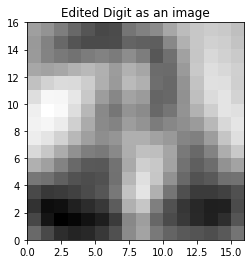

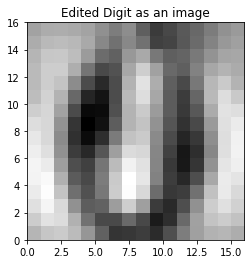

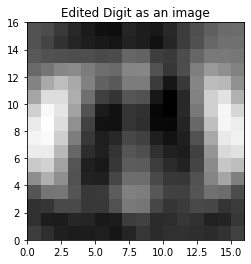

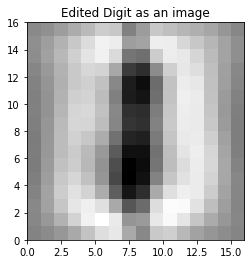

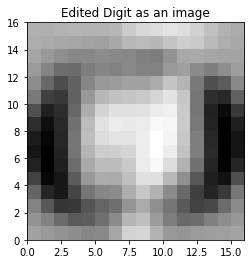

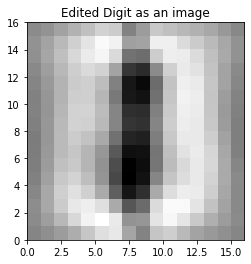

[-0.8644462  -0.28491474 -0.57897792 ... -0.3432904  -0.63569252
 -0.59428231]


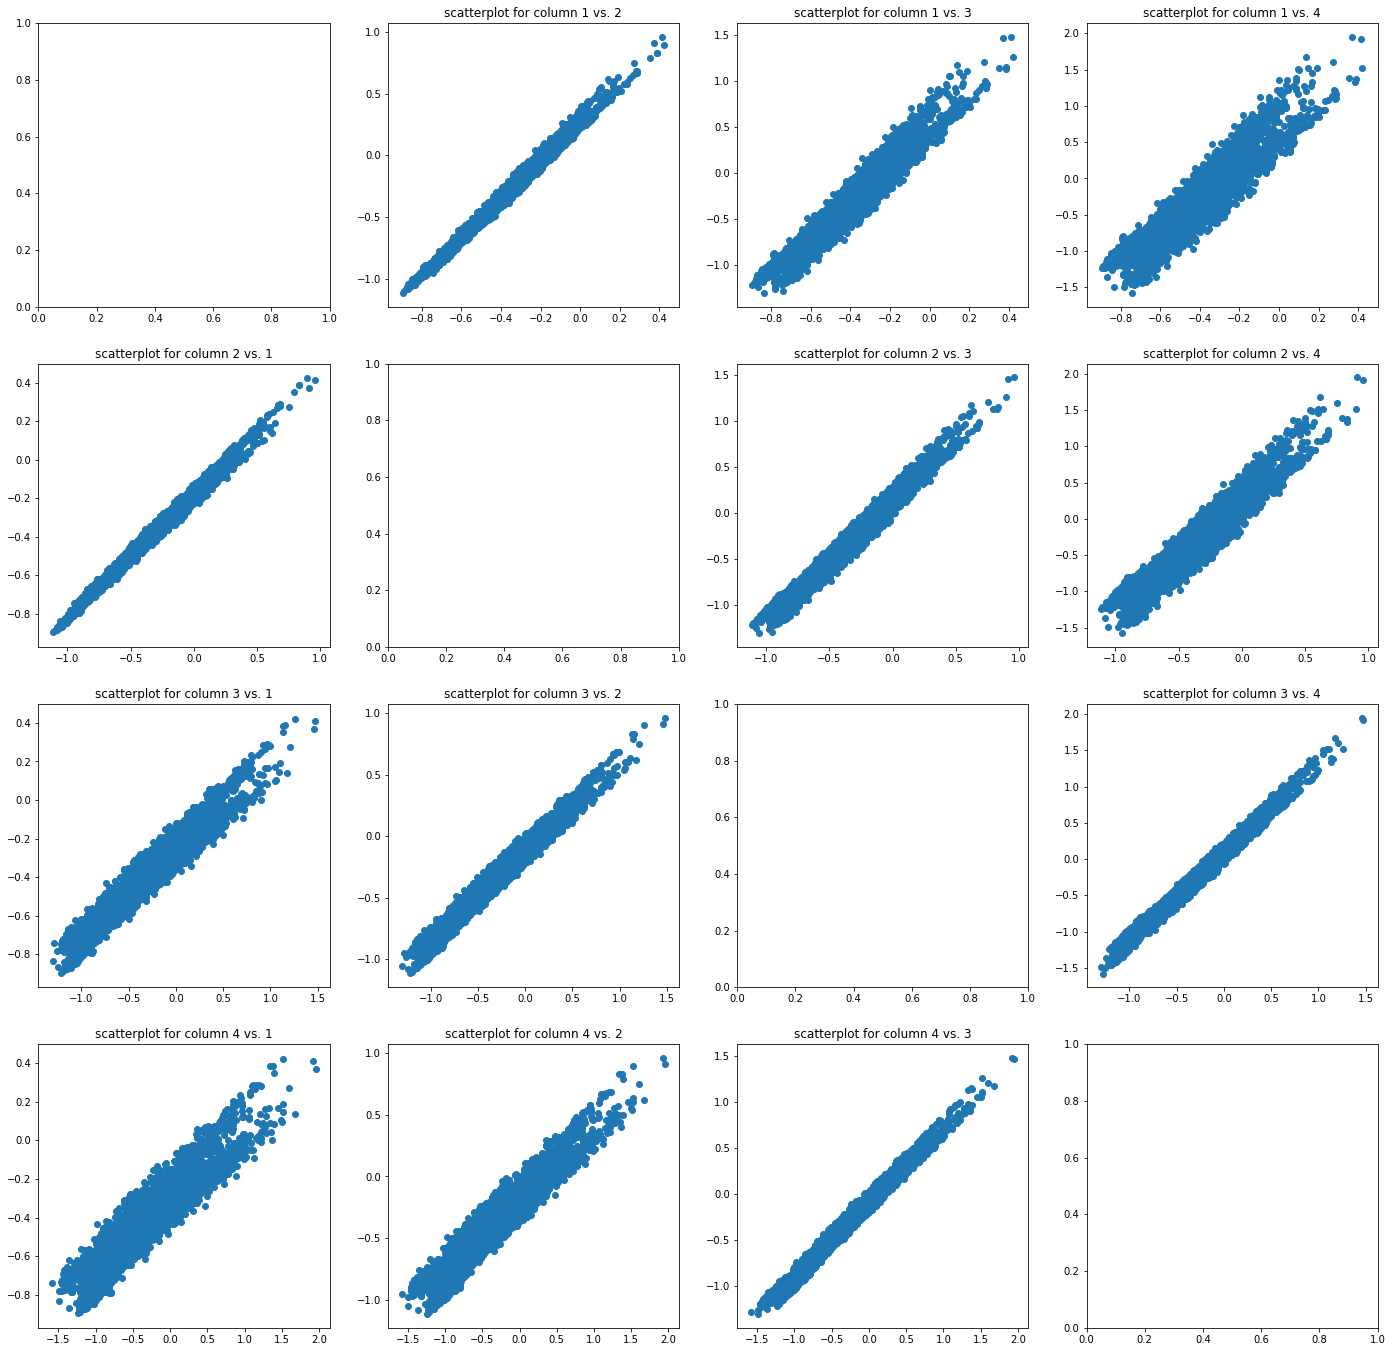

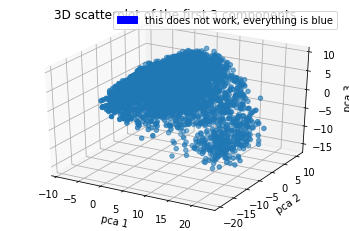

In [40]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
from scipy.io import loadmat
from numpy import reshape
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

# Index of the digit to display


# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]
#print(X)
#meancenter
X_scaled = preprocessing.scale(X)
#svd 
U, S,V = np.linalg.svd(X_scaled)
#transpose V
V =np.matrix.transpose(V)
#execute pca with 4 components
Z = np.matmul(X_scaled,V[:,0:4])
print(Z)
W = np.matmul(Z, np.matrix.transpose(V[:,:4]))
mean = np.mean(X)
W = W + mean

# Visualize the i'th digit as an image
for i in range(10):
    plt.subplot(1,1,1);
    I = reshape(X[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
    plt.show()
for i in range(10):
    plt.subplot(1,1,1);
    I = reshape(W[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Edited Digit as an image');
    plt.show()
    
mnistf, mnistarr = plt.subplots(4,4, figsize=(24,24))
v = 0
h = 0
print(W[:,0])
for i in range (16):
    if h == 4:
        h = 0
        v+=1
    if v != h:
        mnistarr[v,h].scatter(W[:,v],W[:,h])
        mnistarr[v,h].set_title("scatterplot for column "+str(v+1)+" vs. "+str(h+1))
    h += 1
threescatter = plt.figure()
tdsc = threescatter.add_subplot(111, projection='3d')
tdsc.scatter(Z[:,0],Z[:,1],Z[:,2])
tdsc.set_xlabel("pca 1")
tdsc.set_ylabel("pca 2")
tdsc.set_zlabel("pca 3")
tdsc.set_title("3D scatterplot of the first 3 components")
patch = mpatches.Patch(color='blue',label='this does not work, everything is blue')
tdsc.legend(handles=[patch])

#------------------------------------------------

----


----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [41]:
import numpy as np
alien_limbs = np.array([2,3,6,8,11,18])
print("mean: " ,np.ndarray.mean(alien_limbs) )
print("sigma: ", np.ndarray.std(alien_limbs))


mean:  8.0
sigma:  5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [42]:
import itertools as it

Two = it.combinations(alien_limbs, 2)
Four = it.combinations(alien_limbs, 4)

print("with samples of 2: ")

for i in Two:
    print(i)
    print("samplemean: "+str(np.ndarray.mean(np.array(i))))
    
print("with samples of 4: ")

for i in Four:
    print(i)
    print("samplemean: "+str(np.ndarray.mean(np.array(i))))

with samples of 2: 
(2, 3)
samplemean: 2.5
(2, 6)
samplemean: 4.0
(2, 8)
samplemean: 5.0
(2, 11)
samplemean: 6.5
(2, 18)
samplemean: 10.0
(3, 6)
samplemean: 4.5
(3, 8)
samplemean: 5.5
(3, 11)
samplemean: 7.0
(3, 18)
samplemean: 10.5
(6, 8)
samplemean: 7.0
(6, 11)
samplemean: 8.5
(6, 18)
samplemean: 12.0
(8, 11)
samplemean: 9.5
(8, 18)
samplemean: 13.0
(11, 18)
samplemean: 14.5
with samples of 4: 
(2, 3, 6, 8)
samplemean: 4.75
(2, 3, 6, 11)
samplemean: 5.5
(2, 3, 6, 18)
samplemean: 7.25
(2, 3, 8, 11)
samplemean: 6.0
(2, 3, 8, 18)
samplemean: 7.75
(2, 3, 11, 18)
samplemean: 8.5
(2, 6, 8, 11)
samplemean: 6.75
(2, 6, 8, 18)
samplemean: 8.5
(2, 6, 11, 18)
samplemean: 9.25
(2, 8, 11, 18)
samplemean: 9.75
(3, 6, 8, 11)
samplemean: 7.0
(3, 6, 8, 18)
samplemean: 8.75
(3, 6, 11, 18)
samplemean: 9.5
(3, 8, 11, 18)
samplemean: 10.0
(6, 8, 11, 18)
samplemean: 10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [43]:
samplemean2 = []
samplemean4 = []
combiTwo = it.combinations(alien_limbs, 2)
for i in combiTwo:
    mean = np.ndarray.mean(np.array(i))
    samplemean2.append(mean)
print("mean and sigma 2: ")
print(np.ndarray.mean(np.array(samplemean2)))
print(np.ndarray.std(np.array(samplemean2)))
combiFour = it.combinations(alien_limbs, 4)
for i in combiFour:
    mean4 = np.ndarray.mean(np.array(i))
    samplemean4.append(mean4)
print("mean and sigma 4:")
print(np.ndarray.mean(np.array(samplemean4)))
print(np.ndarray.std(np.array(samplemean4)))

mean and sigma 2: 
8.0
3.40587727318528
mean and sigma 4:
8.0
1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

----
sample sigma: 3.40587727318528 <br>
sigma: 5.385164807134504 <br>
N = 2, M = 6 <br>
5.385164807134504/sqr(2) = 3.80788 is pretty far off <br>
5.385164807134504/sqr(2) * sqr((6-2)/(6-1)) = 3.45877 checks out 
now with <br>
sample sigma: <br>
N= 4, M = 6 <br>
5.385164807134504/sqr(4) = 2.6925 is pretty far off <br>
5.385164807134504/sqr(4)*sqr((6-4)/(6-1)) = 1,70293863  checks out.


----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

Text(0.5, 1.0, 'Distrubution of sample means for sample size 4')

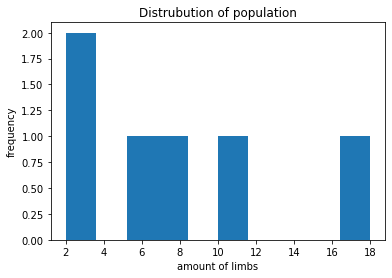

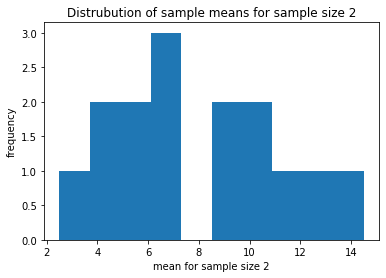

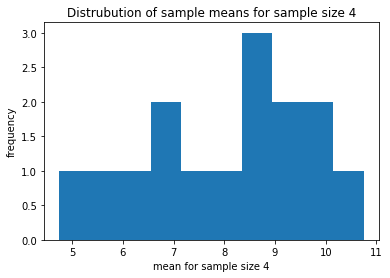

In [44]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
n, bins, patches = plt.hist(alien_limbs)
ax1.set_xlabel("amount of limbs")
ax1.set_ylabel("frequency")
ax1.set_title("Distrubution of population")

fig2 = plt.figure()
mean2 = fig2.add_subplot(1,1,1)
n, bins, patches = plt.hist(samplemean2)
mean2.set_xlabel("mean for sample size 2")
mean2.set_ylabel("frequency")
mean2.set_title("Distrubution of sample means for sample size 2")

fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
n, bins, patches = plt.hist(samplemean4)
ax3.set_xlabel("mean for sample size 4")
ax3.set_ylabel("frequency")
ax3.set_title("Distrubution of sample means for sample size 4")

----
With a sample size 2 we see a nice distribution over the population but when N increases 

----